<a href="https://colab.research.google.com/github/bsap16/hipoteses-spotify/blob/main/analise_de_dado_do_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados das hipóteses para um novo grupo musical

##*Bibliotecas e base de dados*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy import stats
import seaborn as sns

In [ ]:
df = pd.read_csv('spotify.csv')

##*Hipótese I:*


*   Músicas com BPM (Batidas Por Minuto) mais altas fazem mais sucesso em termos de número de streams no Spotify?


Código:



,Teste,Coeficiente de correlação,Coeficiente de correlação (Arredondado),p-valor,p-valor (Arredondado)
0,"Regressão linear entre ""BPM Alto"" e ""Streams""",0.148371,0.148,0.022616,0.023


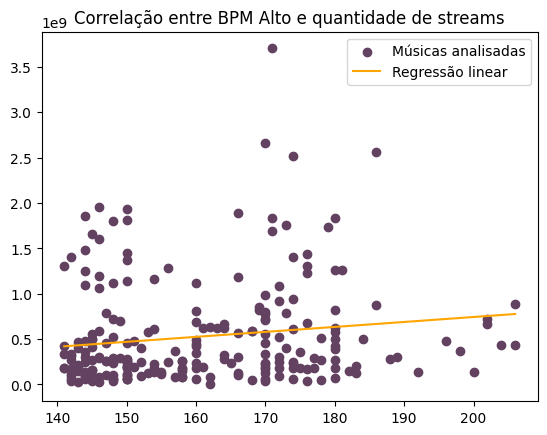

In [ ]:
data_bpm_high = df[df['bpm'] > 140]

bpm = data_bpm_high['bpm'].values
streams_clean = data_bpm_high['streams_clean'].values

model = LinearRegression()
model.fit(bpm.reshape(-1, 1), streams_clean)

r, p_value = pearsonr(bpm, streams_clean)
r_rounded = round(r, 3)
p_value_rounded = round(p_value, 3)
resultados_adicionais = {
    'Teste': ['Regressão linear entre "BPM Alto" e "Streams"'],
    'Coeficiente de correlação': [r],
    'Coeficiente de correlação (Arredondado)': [r_rounded],
    'p-valor': [p_value],
    'p-valor (Arredondado)': [p_value_rounded]
}

df_resultados_adicionais = pd.DataFrame(resultados_adicionais)

display(df_resultados_adicionais)

plt.scatter(bpm, streams_clean, color='#634161', label='Músicas analisadas')

bpm_range = np.linspace(bpm.min(), bpm.max(), 100)
predicted_streams = model.predict(bpm_range.reshape(-1, 1))
plt.plot(bpm_range, predicted_streams, color='#FFA500', label='Regressão linear')

plt.title('Correlação entre BPM Alto e quantidade de streams')
plt.legend()
plt.show()


O coeficiente de correlação apresentado como 0.148 indica que existe uma correlação **fraca** entre os valores de BPM da categoria alto e o número de streams. Isso significa que, embora *haja uma tendência de músicas com BPM alto terem mais streams, essa tendência não é muito forte*.

O valor p referente a correlação de Pearson é **significativo**. Isso significa que existe uma *baixa probabilidade de que a correlação observada seja devido ao acaso*. Em outras palavras, podemos ter confiança de que a correlação entre o BPM alto e o número de streams é **real**.



## *Hipótese II:*



*   As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas, como a Deezer?

Código:


,Teste,Coeficiente de Correlação,Coeficiente de Correlação (Arredondado),p-valor,p-valor (Arredondado)
0,Correlação de Spearman Spotify - Apple,0.518665,0.519,1.813648e-66,0.0
1,Correlação de Spearman Spotify - Deezer,0.588329,0.588,1.896058e-89,0.0


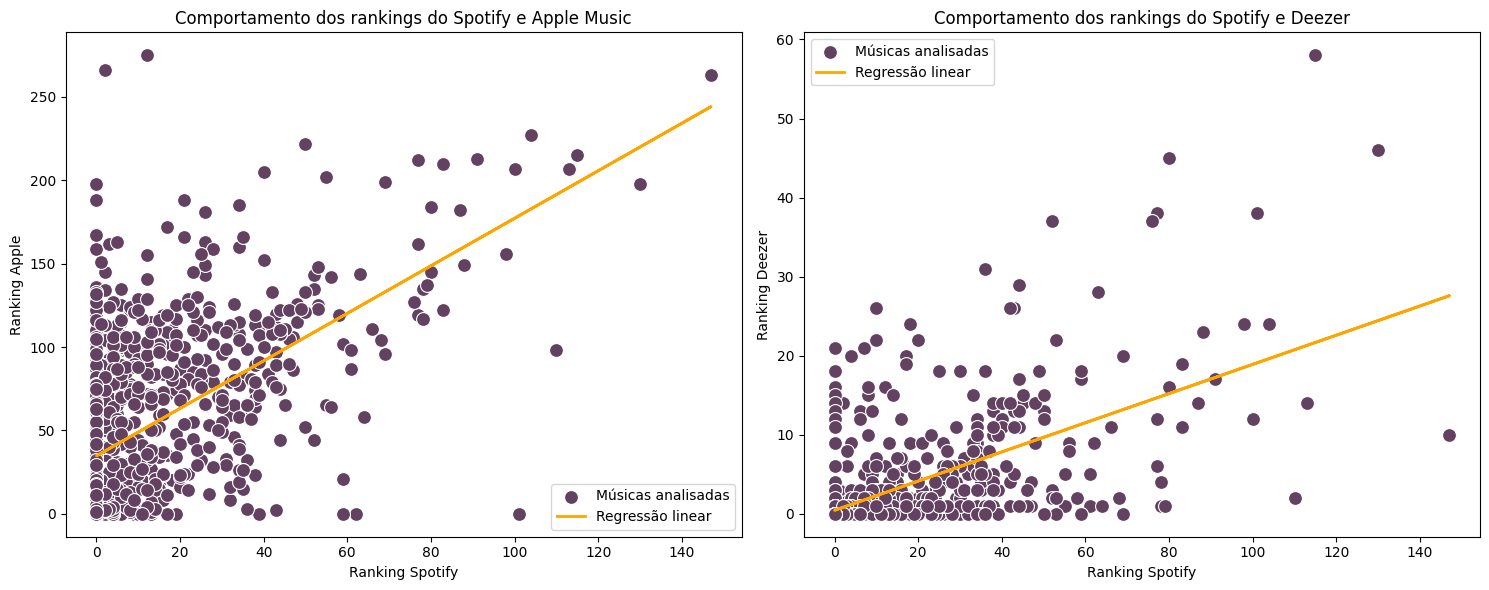

In [ ]:
corr_spotify_apple, p_value_spotify_apple = spearmanr(df['in_spotify_charts'], df['in_apple_charts'], nan_policy='omit')

corr_spotify_deezer, p_value_spotify_deezer = spearmanr(df['in_spotify_charts'], df['in_deezer_charts'], nan_policy='omit')

corr_spotify_apple_rounded = round(corr_spotify_apple, 3)
p_value_spotify_apple_rounded = round(p_value_spotify_apple, 3)
corr_spotify_deezer_rounded = round(corr_spotify_deezer, 3)
p_value_spotify_deezer_rounded = round(p_value_spotify_deezer, 3)

resultados_adicionais = {
    'Teste': ['Correlação de Spearman Spotify - Apple', 'Correlação de Spearman Spotify - Deezer'],
    'Coeficiente de Correlação': [corr_spotify_apple, corr_spotify_deezer],
    'Coeficiente de Correlação (Arredondado)': [corr_spotify_apple_rounded, corr_spotify_deezer_rounded],
    'p-valor': [p_value_spotify_apple, p_value_spotify_deezer],
    'p-valor (Arredondado)': [p_value_spotify_apple_rounded, p_value_spotify_deezer_rounded]
}

df_resultados_adicionais = pd.DataFrame(resultados_adicionais)

display(df_resultados_adicionais)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

regressor = LinearRegression()
regressor.fit(df[['in_spotify_charts']], df['in_apple_charts'])
y_apple_pred = regressor.predict(df[['in_spotify_charts']])

regressor_deezer = LinearRegression()
regressor_deezer.fit(df[['in_spotify_charts']], df['in_deezer_charts'])
y_deezer_pred = regressor_deezer.predict(df[['in_spotify_charts']])



bubble_size = 100
sns.scatterplot(x=df['in_spotify_charts'], y=df['in_apple_charts'], ax=axes[0], color='#634161', label='Músicas analisadas', edgecolor='w', s=bubble_size)
axes[0].plot(df['in_spotify_charts'], y_apple_pred, color='#FFA500', label='Regressão linear', linewidth=2)
axes[0].set_title('Comportamento dos rankings do Spotify e Apple Music')
axes[0].set_xlabel('Ranking Spotify')
axes[0].set_ylabel('Ranking Apple')
axes[0].legend()

bubble_size = 100
sns.scatterplot(x=df['in_spotify_charts'], y=df['in_deezer_charts'], ax=axes[1], color='#634161', label='Músicas analisadas', edgecolor='w', s=bubble_size)
axes[1].plot(df['in_spotify_charts'], y_deezer_pred, color='#FFA500', label='Regressão linear', linewidth=2)
axes[1].set_title('Comportamento dos rankings do Spotify e Deezer')
axes[1].set_xlabel('Ranking Spotify')
axes[1].set_ylabel('Ranking Deezer')
axes[1].legend()

plt.tight_layout()
plt.show()


A correlação de Spearman entre os rankings do Spotify com os rankings da Apple Music e do ranking do Spotify com os rankings do Deezer são **positivas e significativas**.

O valor-p **muito baixo** indica que essa correlação provavelmente **não ocorre ao acaso**. No entanto, é importante ressaltar que a correlação de Spearman **não implica causalidade direta**. Embora exista uma associação entre os rankings, não podemos afirmar que o aumento no ranking de um serviço de streaming causa diretamente o aumento no ranking do outro. Em vez disso, outros fatores podem estar contribuindo para essa relação observada.


##*Hipótese III:*


*   A presença de uma música em um maior número de playlists está correlacionada com um maior número de streams?

Código:


,Teste,Coeficiente de Correlação,Coeficiente de Correlação (Arredondado),p-valor,p-valor (Arredondado)
0,Correlação de Spearman Spotify - Apple,0.518665,0.519,1.813648e-66,0.0
1,Correlação de Spearman Spotify - Deezer,0.588329,0.588,1.896058e-89,0.0


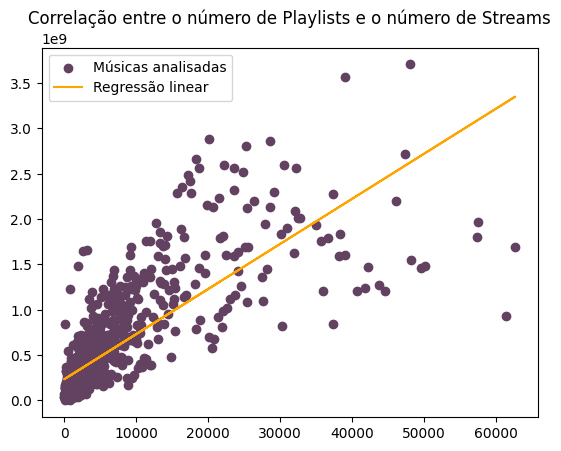

In [ ]:
playlists_total = df['playlists_total'].values
streams_clean = df['streams_clean'].values

r2, p_value2 = pearsonr(playlists_total, streams_clean)
r2_rounded = round(r2, 3)
p_value2_rounded = round(p_value2, 3)
r1, p_value1 = pearsonr(playlists_total, streams_clean)
resultados_adicionais = {
    'Teste': ['Correlação de Pearson'],
    'Coeficiente de Correlação': [r2],
    'Coeficiente de Correlação (Arredondado)': [r2_rounded],
    'p-valor': [p_value2],
    'p-valor (Arredondado)': [p_value2_rounded]
}
display(df_resultados_adicionais)
df_resultados_adicionais = pd.DataFrame(resultados_adicionais)

plt.scatter(playlists_total, streams_clean, color='#634161', label='Músicas analisadas')

model1 = LinearRegression()
model1.fit(playlists_total.reshape(-1, 1), streams_clean)
predicted_spotify_charts = model1.predict(playlists_total.reshape(-1, 1))
plt.plot(playlists_total, predicted_spotify_charts, color='#FFA500', label='Regressão linear')

plt.title('Correlação entre o número de Playlists e o número de Streams')
plt.legend()
plt.show()

Esses dados revelam uma correlação **bastante forte** entre o total de playlists do Spotify e o total de streams. Além disso, o valor-p **extremamente baixo** indica que essa correlação é **altamente significativa** estatisticamente, sugerindo que essa associação **não é provável de ocorrer ao acaso**.

Essa **forte correlação** sugere que há uma **relação positiva** entre o número de playlists criadas e o número total de streams no Spotify. Isso pode indicar que um *aumento no número de playlists está associado a um aumento no número total de streams, ou vice-versa*. No entanto, é importante notar que correlação não implica causalidade direta, ou seja, *não podemos concluir que criar mais playlists diretamente causa um aumento nos streams ou vice-versa*. Outros fatores podem estar influenciando essa relação observada, como gênero musical, artista, letra da música, etc...

##*Hipótese IV:*


*   Artistas com um maior número de músicas no Spotify têm mais streams?

Código:

,Teste,Coeficiente de correlação,Coeficiente de correlação (Arredondado),p-valor,p-valor (Arredondado)
0,Correlação de Pearson,0.90341,0.9,0.0,0.0


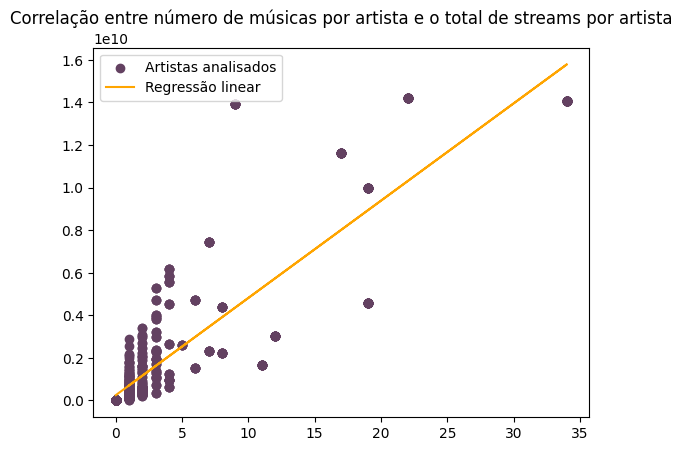

In [ ]:
amount_of_tracks = df['amount_of_tracks'].values
total_streams = df['total_streams'].values

amount_of_tracks_clean = amount_of_tracks[~np.isnan(amount_of_tracks)]
total_streams_clean = total_streams[~np.isnan(total_streams)]
r1, p_value1 = pearsonr(amount_of_tracks_clean, total_streams_clean)

r1_rounded = round(r1, 2)
p_value1_rounded = round(p_value1, 2)

resultados_resumo = {
    'Teste': ['Correlação de Pearson'],
    'Coeficiente de correlação': [r1],
    'Coeficiente de correlação (Arredondado)': [r1_rounded],
    'p-valor': [p_value1],
    'p-valor (Arredondado)': [p_value1_rounded]
}

df_resultados_resumo = pd.DataFrame(resultados_resumo)

display(df_resultados_resumo)

plt.scatter(amount_of_tracks_clean, total_streams_clean, color='#634161', label='Artistas analisados')

model1 = LinearRegression()
model1.fit(amount_of_tracks_clean.reshape(-1, 1), total_streams_clean)
predicted_total_streams = model1.predict(amount_of_tracks_clean.reshape(-1, 1))
plt.plot(amount_of_tracks_clean, predicted_total_streams, color='#FFA500', label='Regressão linear')

plt.title('Correlação entre número de músicas por artista e o total de streams por artista')
plt.legend()
plt.show()


Os dados indicam uma correlação **muito forte** entre o número de músicas de um artista e o total de streams de suas músicas. Além disso, o valor-p **extremamente baixo** indica que essa correlação é **altamente significativa** estatisticamente, sugerindo que *essa associação não é provável de ocorrer ao acaso*.

Essa **forte correlação** sugere que artistas com um grande número de músicas tendem a acumular mais streams no total em comparação com artistas que têm menos músicas disponíveis. No entanto, é importante notar que correlação não implica causalidade direta. Assim, *não podemos afirmar que o aumento do número de músicas de um artista diretamente causa um aumento no total de streams, ou vice-versa*. Outros fatores, como popularidade do artista, promoção, qualidade das músicas, entre outros, podem estar influenciando essa relação observada.

##*Hipótese V:*


*   As características da música influenciam o sucesso em termos de número de streams no Spotify?



**Característica:** BPM (Batidas Por Minuto)

Código:

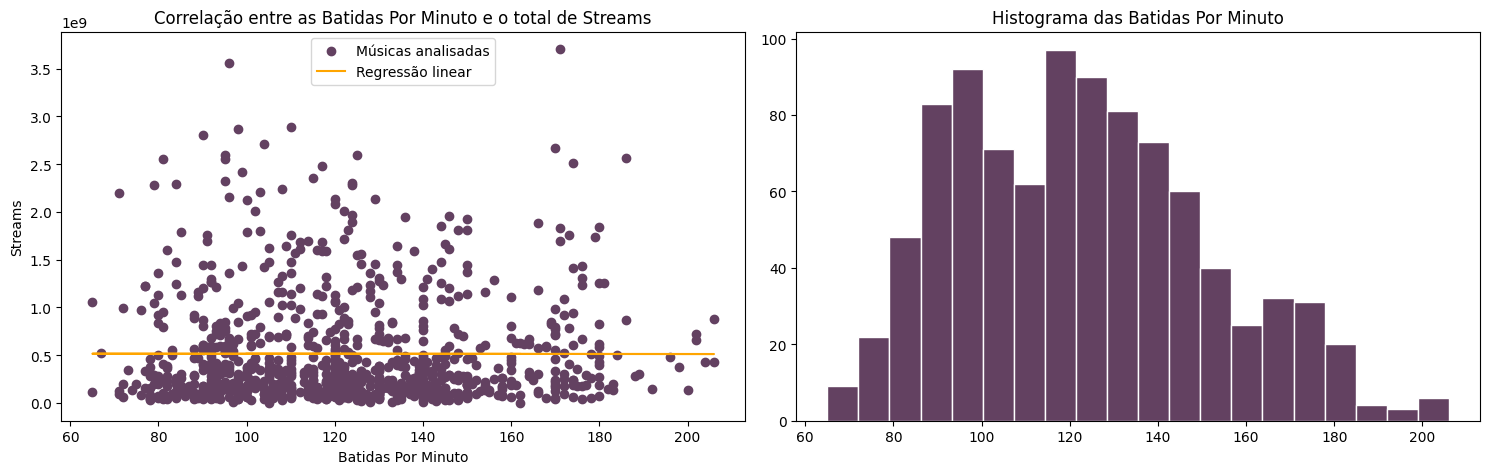

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro de Batidas Por Minuto,0.977355,0.98,5.487078e-11,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,0.004206,0.00,8.970301e-01,0.90


In [ ]:
shapiro_bpm, p_value_bpm = shapiro(df['bpm'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['bpm'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['bpm'], df['streams_clean'])

model = LinearRegression()
model.fit(df['bpm'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['bpm'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['bpm'], intercepto_linear + coeficiente_angular * df['bpm'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre as Batidas Por Minuto e o total de Streams')
axs[0].set_xlabel('Batidas Por Minuto')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['bpm'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma das Batidas Por Minuto')

plt.tight_layout()
plt.show()

shapiro_bpm_rounded = round(shapiro_bpm, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro de Batidas Por Minuto', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_bpm, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_bpm_rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_bpm, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_bpm:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

Os dados indicam que as características relacionadas às batidas por minuto tendem a seguir uma **distribuição normal**, sugerindo que essa métrica pode desempenhar um papel consistente na percepção do sucesso de uma música. No entanto, as informações sobre os streams **não mostram essa tendência**, indicando uma possível variabilidade nas preferências dos usuários. Além disso, o teste de Mann-Whitney U revela uma **diferença significativa** entre os grupos analisados, o que sugere que certas características musicais podem influenciar de maneira distinta o número de streams. No entanto, a **falta de correlação significativa** entre as variáveis testadas destacam a complexidade na determinação precisa do impacto das características da música no sucesso em termos de streams no Spotify.

**Característica:** Dançabilidade (danceability)

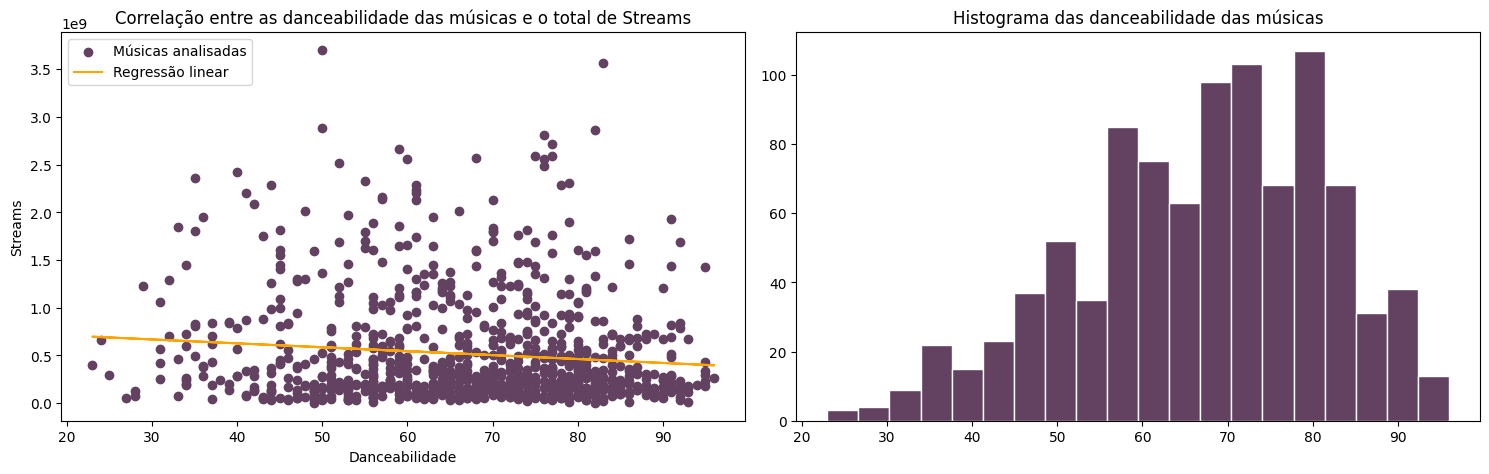

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro de Danceabilidade,0.977355,0.98,5.487078e-11,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.082289,-0.08,1.121422e-02,0.01


In [ ]:
shapiro_danceability__, p_value_danceability__ = shapiro(df['danceability__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['danceability__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['danceability__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['danceability__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['danceability__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['danceability__'], intercepto_linear + coeficiente_angular * df['danceability__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre as danceabilidade das músicas e o total de Streams')
axs[0].set_xlabel('Danceabilidade')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['danceability__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma das danceabilidade das músicas')

plt.tight_layout()
plt.show()

shapiro_bpm_rounded = round(shapiro_bpm, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro de Danceabilidade', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_bpm, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_bpm_rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_bpm, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_bpm:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

A danceabilidade das músicas tende a seguir uma **distribuição normal**, indicando que essa métrica pode desempenhar um papel **consistente** na avaliação do sucesso de uma música. No entanto, os dados de streams não mostram a mesma tendência, sugerindo uma possível variação nas preferências dos usuários em relação a diferentes características musicais.

Além disso, o teste de Mann-Whitney U revela uma **diferença significativa** entre os grupos analisados, indicando que certas características musicais podem influenciar de maneira distinta o número de streams obtidos. No entanto, a correlação de Spearman apresenta um **coeficiente negativo**, embora não seja estatisticamente significativo, sugerindo uma **associação fraca ou inexistente** entre as características musicais e o número de streams.

**Característica:** Acústica (acousticness)

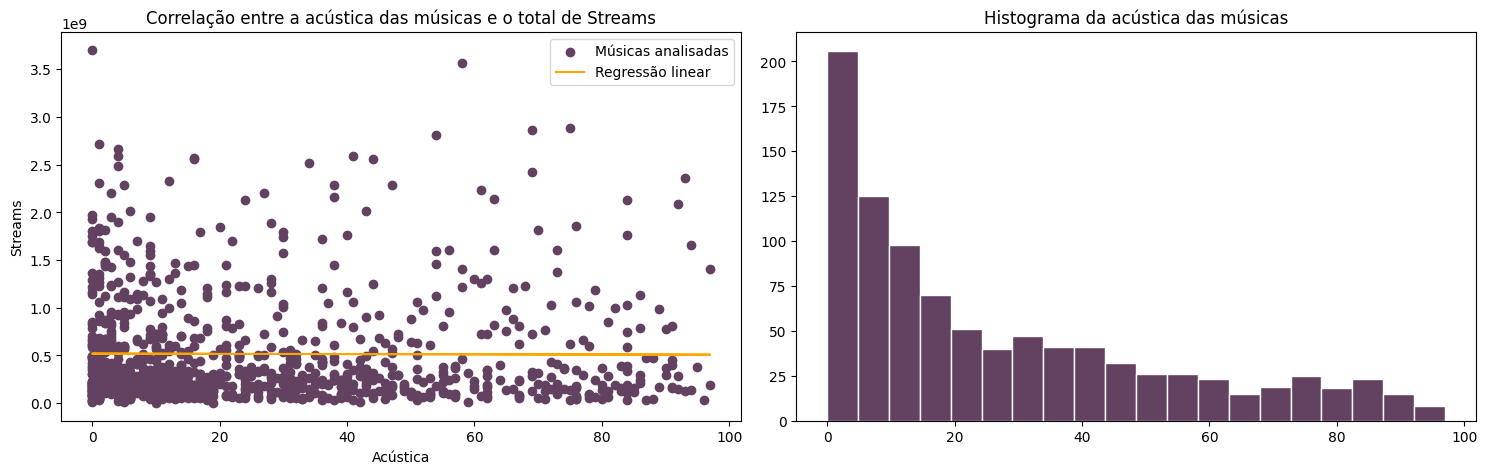

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro de Acústica,0.872085,0.87,3.623072e-27,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.060472,-0.06,6.258229e-02,0.06


In [ ]:
shapiro_acousticness__, p_value_acousticness__ = shapiro(df['acousticness__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['acousticness__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['acousticness__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['acousticness__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['acousticness__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['acousticness__'], intercepto_linear + coeficiente_angular * df['acousticness__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre a acústica das músicas e o total de Streams')
axs[0].set_xlabel('Acústica')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['acousticness__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma da acústica das músicas')

plt.tight_layout()
plt.show()

shapiro_acousticness___rounded = round(shapiro_acousticness__, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro de Acústica', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_acousticness__, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_acousticness___rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_acousticness__, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_acousticness__:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

O teste de Shapiro de Acústica revela que essa característica tende a seguir uma **distribuição normal**, sugerindo sua importância na percepção do êxito de uma música. No entanto, os dados de streams não apresentam a mesma regularidade, indicando uma possível diversidade nas preferências dos usuários em relação a diferentes aspectos musicais.

O teste de Mann-Whitney U evidencia uma **diferença significativa** entre os grupos analisados, indicando que certas características musicais podem influenciar de forma distinta o número de streams. No entanto, a correlação de Spearman, embora **negativa**, **não é estatisticamente significativa**, o que sugere uma **associação fraca ou inexistente** entre as características musicais e o número de streams.

**Característica:** Energia (energy)

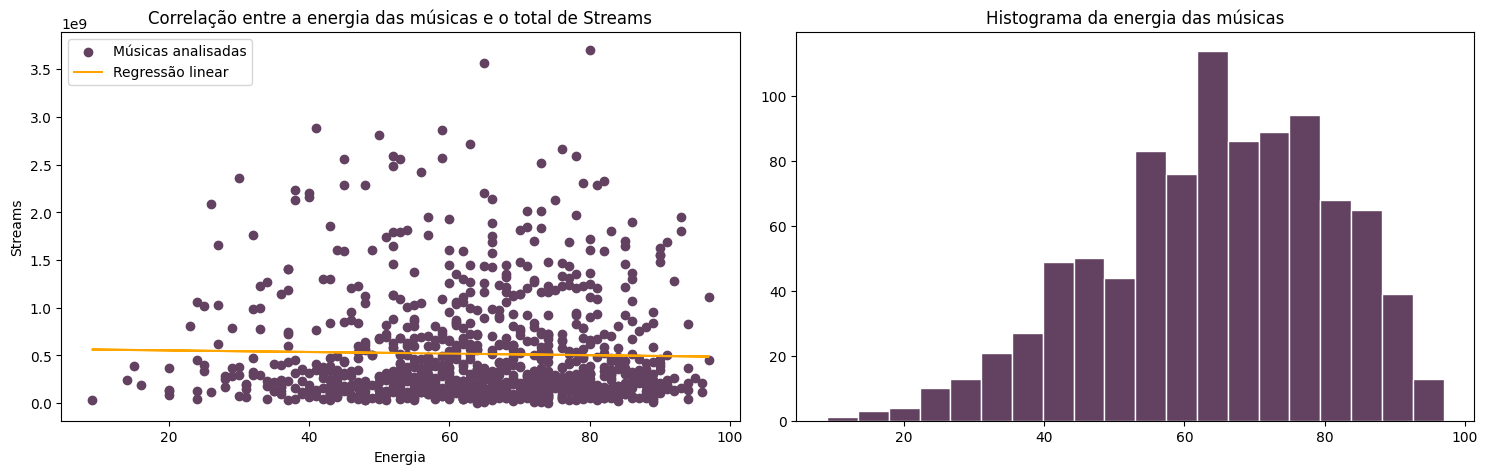

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro de Energia,0.980669,0.98,6.728231e-10,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.031484,-0.03,3.326159e-01,0.33


In [ ]:
shapiro_energy__, p_value_energy__ = shapiro(df['energy__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['energy__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['energy__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['energy__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['energy__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['energy__'], intercepto_linear + coeficiente_angular * df['energy__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre a energia das músicas e o total de Streams')
axs[0].set_xlabel('Energia')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['energy__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma da energia das músicas')

plt.tight_layout()
plt.show()

shapiro_energy___rounded = round(shapiro_energy__, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro de Energia', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_energy__, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_energy___rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_energy__, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_energy__:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

O teste de Shapiro de Energia sugere que essa característica tende a seguir uma **distribuição normal**, o que ressalta sua importância na percepção da vitalidade das músicas.

O teste de Mann-Whitney U mostra uma **diferença significativa** entre os grupos analisados, indicando que características específicas das músicas podem influenciar de forma distinta o número de streams. No entanto, a correlação de Spearman revela uma **associação negativa**, embora não seja estatisticamente significativa, sugerindo que outras variáveis podem ter uma influência maior no número de streams.
Isso sugere que a energia das músicas pode não ser um preditor confiável do sucesso em termos de streams no Spotify. Esses resultados destacam a complexidade na compreensão do comportamento dos usuários e na avaliação do impacto das características musicais no desempenho das músicas na plataforma.

**Característica:** Instrumentalidade
 (instrumentalness)

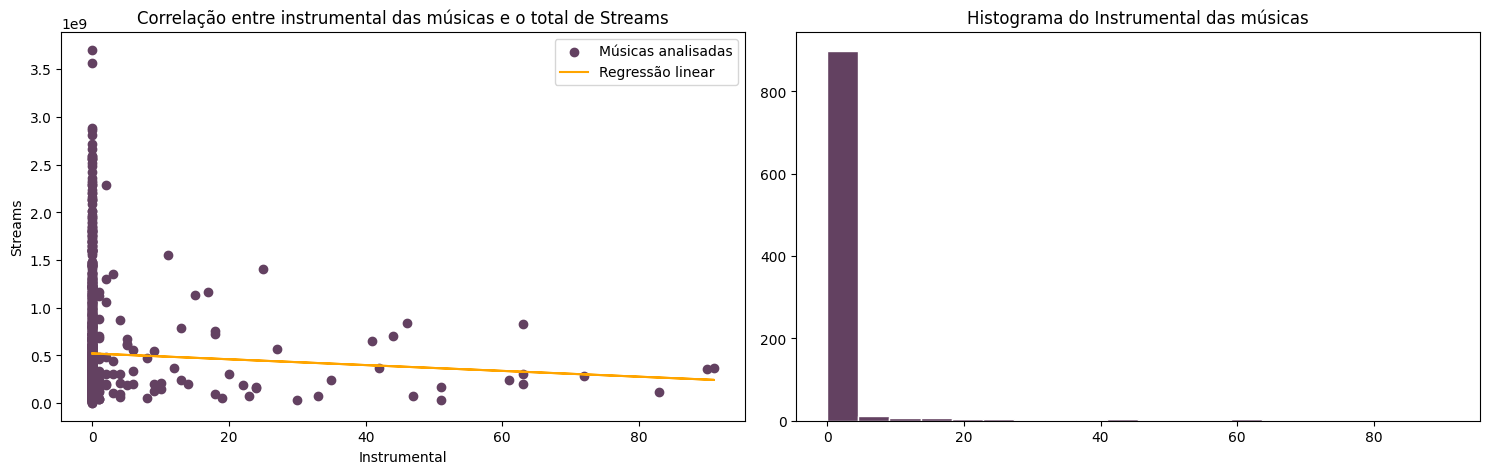

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro do Instrumental,0.189183,0.19,0.000000e+00,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.004701,-0.00,8.849938e-01,0.88


In [ ]:
shapiro_instrumentalness__, p_value_instrumentalness__ = shapiro(df['instrumentalness__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['instrumentalness__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['instrumentalness__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['instrumentalness__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['instrumentalness__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['instrumentalness__'], intercepto_linear + coeficiente_angular * df['instrumentalness__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre instrumental das músicas e o total de Streams')
axs[0].set_xlabel('Instrumental')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['instrumentalness__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma do Instrumental das músicas')

plt.tight_layout()
plt.show()

shapiro_instrumentalness___rounded = round(shapiro_instrumentalness__, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro do Instrumental', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_instrumentalness__, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_instrumentalness___rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_instrumentalness__, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_instrumentalness__:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

O teste de Shapiro do Instrumental sugere que essa característica **não segue uma distribuição normal**, o que pode indicar uma variedade de preferências entre os usuários em relação à presença de elementos instrumentais nas músicas.

O teste de Mann-Whitney U revela uma **diferença significativa** entre os grupos analisados, indicando que características musicais específicas podem influenciar de maneira distinta o número de streams. No entanto, a correlação de Spearman mostra uma **associação quase nula** entre as características musicais e o número de streams, sugerindo que outros fatores podem ter uma influência maior nesse resultado.

**Característica:** Fala (speechiness)

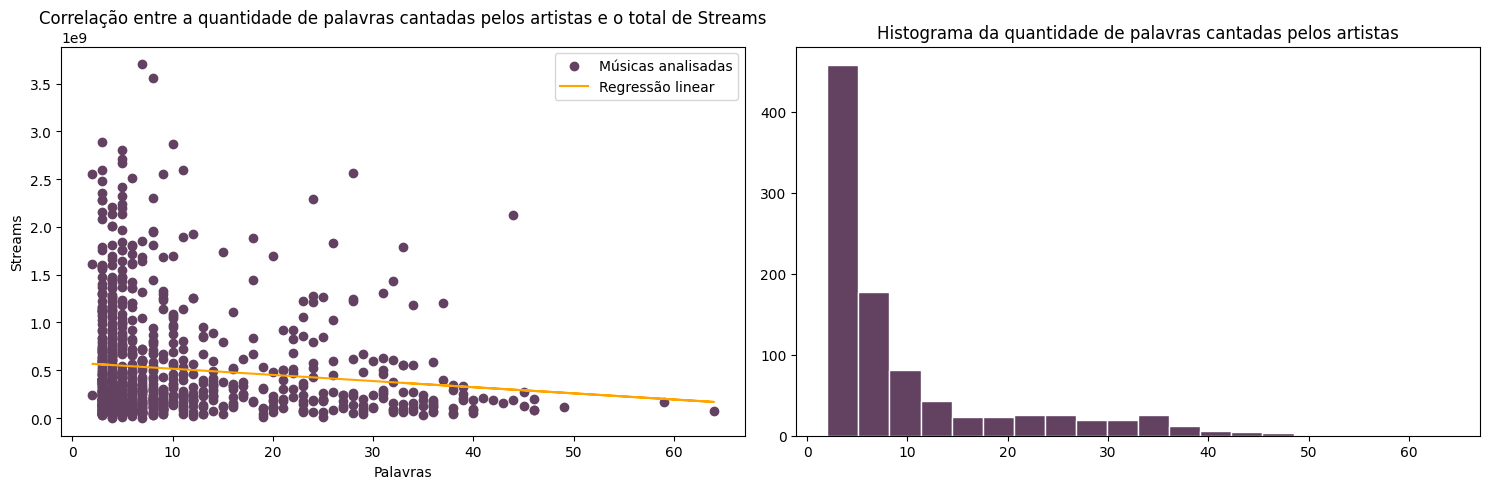

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro das Palavras,0.714448,0.71,2.413037e-37,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.107429,-0.11,9.175045e-04,0.00


In [ ]:
shapiro_speechiness__, p_value_speechiness__ = shapiro(df['speechiness__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['speechiness__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['speechiness__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['speechiness__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['speechiness__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['speechiness__'], intercepto_linear + coeficiente_angular * df['speechiness__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre a quantidade de palavras cantadas pelos artistas e o total de Streams')
axs[0].set_xlabel('Palavras')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['speechiness__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma da quantidade de palavras cantadas pelos artistas')

plt.tight_layout()
plt.show()

shapiro_speechiness___rounded = round(shapiro_speechiness__, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro das Palavras', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_speechiness__, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_speechiness___rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_speechiness__, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_speechiness__:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

O teste de Shapiro da quantidade de palavras cantadas sugere que essa característica **não segue uma distribuição normal**, indicando uma variedade nas preferências dos usuários em relação à densidade das letras das músicas.

O teste de Mann-Whitney U mostra uma **diferença significativa** entre os grupos analisados, o que indica que características específicas das músicas podem influenciar de forma distinta o número de streams. No entanto, a correlação de Spearman revela uma **associação negativa**, embora **não seja estatisticamente significativa**, sugerindo que outras variáveis podem ter uma influência maior no número de streams.

**Característica:** Vivacidade (liveness)

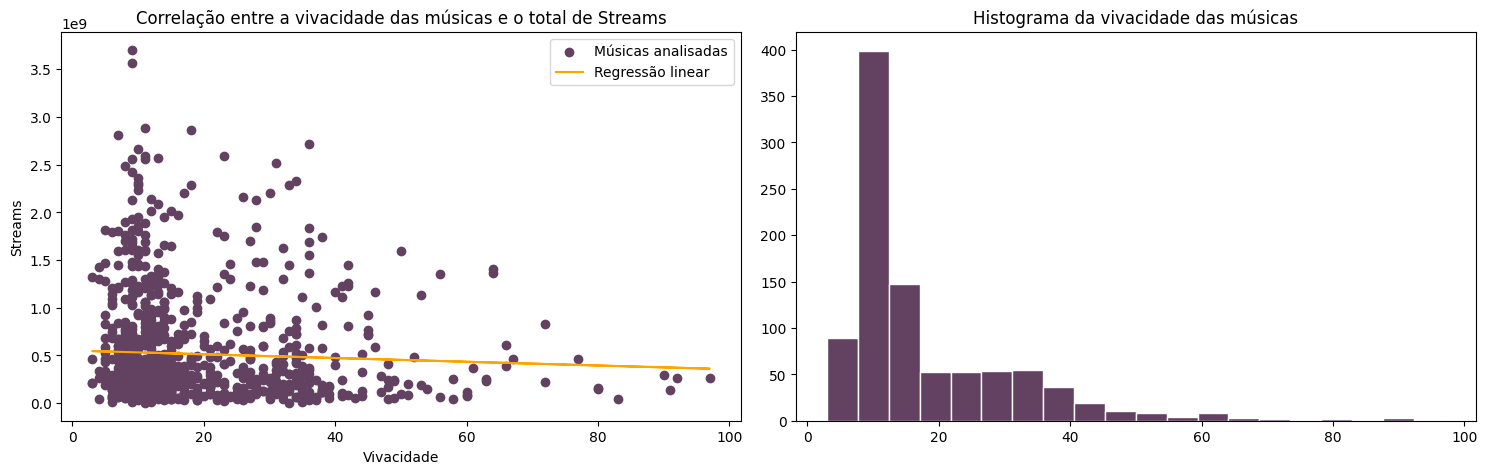

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro da Vivacidade,0.770328,0.77,2.041928e-34,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.058939,-0.06,6.954769e-02,0.07


In [ ]:
shapiro_liveness__, p_value_liveness__ = shapiro(df['liveness__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['liveness__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['liveness__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['liveness__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['liveness__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['liveness__'], intercepto_linear + coeficiente_angular * df['liveness__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre a vivacidade das músicas e o total de Streams')
axs[0].set_xlabel('Vivacidade')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['liveness__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma da vivacidade das músicas')

plt.tight_layout()
plt.show()

shapiro_liveness___rounded = round(shapiro_liveness__, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro da Vivacidade', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_liveness__, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_liveness___rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_liveness__, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_liveness__:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

O teste de Shapiro da Vivacidade sugere que essa característica **não segue uma distribuição normal**, indicando uma diversidade nas preferências dos usuários em relação à energia das músicas.

O teste de Mann-Whitney U revela uma **diferença significativa** entre os grupos analisados, o que sugere que características específicas das músicas podem influenciar de forma distinta o número de streams. No entanto, a correlação de Spearman mostra uma **associação negativa**, embora não seja estatisticamente significativa, sugerindo que outras variáveis podem ter uma influência maior no número de streams.

**Característica:** Valência (valence)

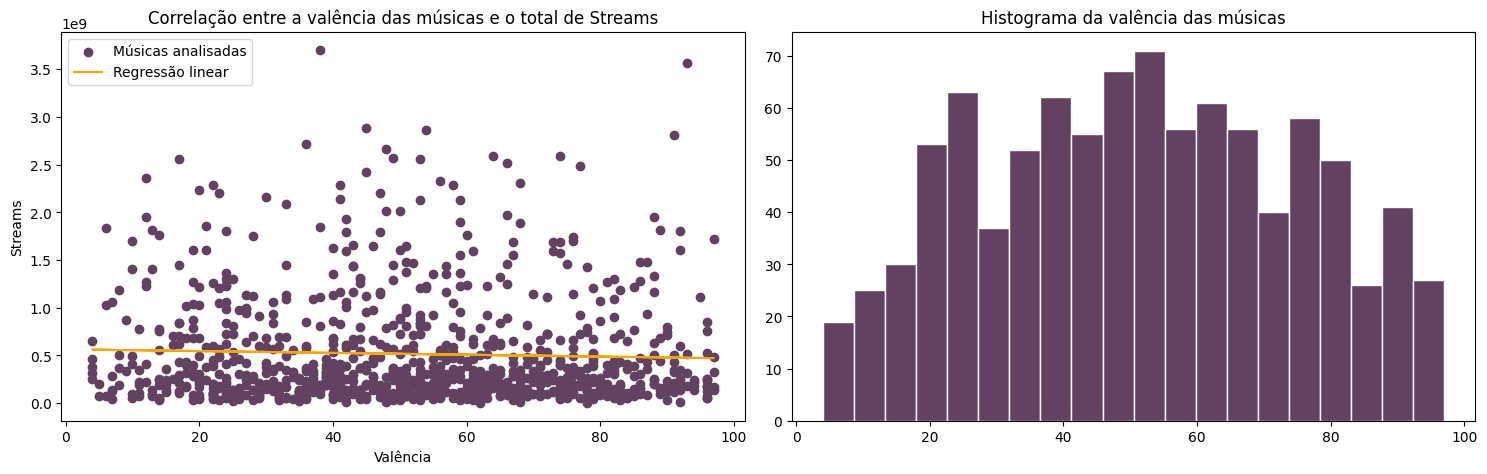

,Testes,Estatística/Coeficiente,Estatística/Coeficiente (Arredondado),p-valor/Intercepto Linear,p-valor/Intercepto Linear (Arredondado)
0,Shapiro da Valência,0.977527,0.98,6.211381e-11,0.00
1,Shapiro de Streams,0.761937,0.76,6.858946e-35,0.00
2,Mann-Whitney U,0.000000,0.00,0.000000e+00,0.00
3,Correlação de Spearman,-0.036790,-0.04,2.575389e-01,0.26


In [ ]:
shapiro_valence__, p_value_valence__ = shapiro(df['valence__'])
shapiro_streams, p_value_streams = shapiro(df['streams_clean'])

statistic_mwu, p_value_mwu = mannwhitneyu(df['valence__'], df['streams_clean'])

spearman_corr, p_value_spearman = spearmanr(df['valence__'], df['streams_clean'])

model = LinearRegression()
model.fit(df['valence__'].values.reshape(-1, 1), df['streams_clean'])
coeficiente_angular = model.coef_[0]
intercepto_linear = model.intercept_

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df['valence__'], df['streams_clean'], color='#634161', label='Músicas analisadas')
axs[0].plot(df['valence__'], intercepto_linear + coeficiente_angular * df['valence__'], color='#FFA500', label='Regressão linear')
axs[0].set_title('Correlação entre a valência das músicas e o total de Streams')
axs[0].set_xlabel('Valência')
axs[0].set_ylabel('Streams')
axs[0].legend()

axs[1].hist(df['valence__'], bins=20, color='#634161', edgecolor='white')
axs[1].set_title('Histograma da valência das músicas')

plt.tight_layout()
plt.show()

shapiro_valence___rounded = round(shapiro_valence__, 2)
shapiro_streams_rounded = round(shapiro_streams, 2)
statistic_mwu_rounded = round(statistic_mwu, 2)
spearman_corr_rounded = round(spearman_corr, 2)
coeficiente_angular_rounded = round(coeficiente_angular, 2)
intercepto_linear_rounded = round(intercepto_linear, 2)

resultados = {
    'Testes': ['Shapiro da Valência', 'Shapiro de Streams', 'Mann-Whitney U', 'Correlação de Spearman'],
    'Estatística/Coeficiente': [shapiro_valence__, shapiro_streams, statistic_mwu, spearman_corr],
    'Estatística/Coeficiente (Arredondado)': [shapiro_valence___rounded, shapiro_streams_rounded, statistic_mwu_rounded, spearman_corr_rounded],
    'p-valor/Intercepto Linear': [p_value_valence__, p_value_streams, p_value_mwu, p_value_spearman],
    'p-valor/Intercepto Linear (Arredondado)': [f'{p_value_valence__:.2f}', f'{p_value_streams:.2f}', f'{p_value_mwu:.2f}', f'{p_value_spearman:.2f}']
}

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

O teste de Shapiro da Valência indica que essa característica tende a seguir uma **distribuição normal**, sugerindo sua importância na percepção do apelo emocional das músicas.

O teste de Mann-Whitney U mostra uma **diferença significativa** entre os grupos analisados, o que sugere que características específicas das músicas podem influenciar de maneira distinta o número de streams. No entanto, a correlação de Spearman indica uma **associação negativa**, embora não seja estatisticamente significativa, sugerindo que outras variáveis podem ter uma influência maior no número de streams.